# Introduction to blockchain HW 1

## Problem 1 (10 points)

Assume that at the end of the term an instructor uses an RSA Public Key Cryptosystem to sign the grades sent to students and to the Education Office. He signs each grade with his private key and transmits both the grade and the signature in a secure manner encrypted with a public key. After you decrypt the message you use his public key to decipher the signature and verify the grade. Assume the cryptosystem has the following features: n=55, e=33 and that the grading system features integer grades from 0 to 10. You have received the grade-signature pairs 8||13 and 6||41

1.Verify that the grades you received are indeed originating from the instructor showing just intermediate results of your calculation (2 points)

As we know n=55, it is mean that (p,q)=5,11. From this knowlege we can found 
$\phi(n)=(p-1)(q-1)=40$, also we can find secret exponent $d\equiv 1Mod(\phi(n)=17$

In order to verifies grades we need to make such operations $(s^e)mod(n)$ where s is signature, and after that we need compare results with mark(see below)

In [45]:
decripted=(13**33)%55
print(decripted)

decripted=(41**33)%55
print(decripted)

8
6


Yes, as we see above, our result are equal to mark in the task

2.Given the information above only can you fabricate the instructors’ signature for another grade? If yes, for which grade and how? (3 points)

Yes, we can to fabricate instructor's signature for another grade, for this we can make simple signature bust(see below). this we can do thanks for small diapazone of marksfrom 0 to 10

In [46]:
for i in range(0,55):
    decripted=(i**33)%55
    if decripted in range(0,11):
        print('signature',i,'mark',decripted)

signature 0 mark 0
signature 1 mark 1
signature 4 mark 9
signature 7 mark 2
signature 10 mark 10
signature 13 mark 8
signature 17 mark 7
signature 25 mark 5
signature 41 mark 6
signature 49 mark 4
signature 53 mark 3


In [47]:
#as we know from punkt 1, d =17, that's why we can make signature for any mark
#firstly lets show how we calculate d
def extended_gcd(a, b):
    x = 0
    y = 1
    lx = 1
    ly = 0
    oa = a
    ob = b
    while b != 0:
        q = a // b
        (a, b)  = (b, a % b)
        (x, lx) = ((lx - (q * x)),x)
        (y, ly) = ((ly - (q * y)),y)
    if (lx < 0): lx += ob
    if (ly < 0): ly += oa
    return lx
def secret_exp(e, p, q): 
    phi_n = (p - 1) * (q - 1)
    d = extended_gcd(e, phi_n)
    print('e - d', e, d)
    return d
print(secret_exp(33, 11, 5))



e - d 33 17
17


In [48]:
for i in range(0,11):
    decripted=(i**17)%55
    print('mark',i,'signature',decripted)


mark 0 signature 0
mark 1 signature 1
mark 2 signature 7
mark 3 signature 53
mark 4 signature 49
mark 5 signature 25
mark 6 signature 41
mark 7 signature 17
mark 8 signature 13
mark 9 signature 4
mark 10 signature 10


3.What would you advise the instructor to do so as to prevent such fabrication? (2 points)

First is increase a diapazone of marks. Also it will be usefull to make $n$ more complicated, in order to if some villian catch up teacher signal, it will more difficut for him to find $\phi(n)$ and $d$ 

4.Discuss what can go wrong in case the instructor sends a grade secretly by first enciphering it with a student’s public key, the signing it with his private key. Provide an example (3 points)

If teacher firstly enciphering it with a student’s public key, the signing it with his private key. If student choose the same public key as teacher's public key, it is mean that encryption will be equal decryption. And for student will be unnecessary to broke it. We can show it via formula $(m^e)^d(modn)=m^{ed}(modn)=m$

That's mean that teacher must look in order ti his public key will not equal to student's public key

## Problem 2 (10 points)

El-Gamal is videly used cryptographic standart. In this task you will implement El-Gamal encryption scheme using Python

1.Implement function for generating keys. The function must generate big random prime number (problem of generating big prime numbers was discussed during seminar after lecture 3). (2 points)

In [49]:
#this code was taken from seminar 2
import random

def is_prime(num, test_count):
    if num == 1:
        return False
    if test_count >= num:
        test_count = num - 1
    for x in range(test_count):
        val = random.randint(1, num - 1)
        if pow(val, num-1, num) != 1:
            return False
    return True

def generate_big_prime(n, test_count=1000):
    found_prime = False
    while not found_prime:
        p = random.randint(2**(n-1), 2**n)
        if is_prime(p, test_count):
            return p
        
n = 8# for increase speed of counting g, lets take 16 bits 
p = generate_big_prime(n)
print('p: ',p)
print("{0:b}".format(p))

#implement function for counting g(primitive roots)
def gcd(a,b):
    while a != b:
        if a > b:
            a = a - b
        else:
            b = b - a
    return a

def primRoots(modulo):
    roots = []
    required_set = set(num for num in range (1, modulo) if gcd(num, modulo) == 1)

    for g in range(1, modulo):
        actual_set = set(pow(g, powers-1) % modulo for powers in range (1, modulo))
        if required_set == actual_set:
            roots.append(g)           
    return roots
G=primRoots(p)
print(G)
g=random.choice(G)

print('g',g)

p:  179
10110011
[2, 6, 7, 8, 10, 11, 18, 21, 23, 24, 26, 28, 30, 32, 33, 34, 35, 37, 38, 40, 41, 44, 50, 53, 54, 55, 58, 62, 63, 69, 71, 72, 73, 78, 79, 84, 86, 90, 91, 92, 94, 96, 97, 98, 99, 102, 103, 104, 105, 109, 111, 112, 113, 114, 115, 118, 119, 120, 122, 123, 127, 128, 130, 131, 132, 133, 134, 136, 137, 140, 143, 148, 150, 152, 154, 157, 159, 160, 162, 163, 164, 165, 166, 167, 170, 174, 175, 176]
g 137


2.Implement functions that realize the encryption and decryption functions. (2 points)

In [50]:
x=random.randint(0,(p-1))
k=random.randint(0,(p-1))
def encryption(M):
    y=pow(g,x,p)
    a=pow(g,k,p)
    b=(M*(y**k))%p
    return (a,b)

def decryption(a,b):
    s=(b*(a)**(p-1-x))%p
    return s
   

3.Test your functions on random values and show that your realization works correctly (1 point)

In [51]:
encryption(78)


(5, 7)

In [52]:
decryption(99,91)

133

as we see our functions work rights, and M=decryption, 78=78

4.Implement functions that realize creation and verification of digital signature (2 points)

In [ ]:
def eea(a,b):
    if b==0:return (1,0)
    (q,r) = (a//b,a%b)
    (s,t) = eea(b,r)
    return (t, s-(q*t) )
def find_inverse(x,y):
    inv = eea(x,y)[0]
    if inv < 1: inv += y #we only want positive values
    return inv  
def signature(m):
    r=pow(g,k,p)
    y=pow(g,x,p)
    s=((m-x*r)*find_inverse(k,p-1))%(p-1)
    pro=((y**r)*(r**s))%p
    pro2=pow(g,m,p)
    return (s,pro,pro2)
 

5.Test your functions on random values and show that your algorithm works correctly (1 point)

In [ ]:
import hashlib
M='Hello world!'
m=hash(M)
x=random.randint(1,(p-1))
k=random.randint(1,(p-1))
signature(m)

As we see oyr check pro and pro2 are uqual, thats mean that our signature correct

## Problem 3 (15 points)

1.Implement SHA256 (https://en.wikipedia.org/wiki/SHA-2) hashing algorithm using the pseudo-code below. Note the great increase in mixing between bits of the w[16..63] words compared to SHA-1 (10 points)

In [249]:
def sha256(data):
    bytes=""
    
    h0 = 0x6a09e667
    h1 = 0xbb67ae85
    h2 = 0x3c6ef372
    h3 = 0xa54ff53a
    h4 = 0x510e527f
    h5 = 0x9b05688c
    h6 = 0x1f83d9ab
    h7 = 0x5be0cd19
    
    k=[ 0x428a2f98, 0x71374491, 0xb5c0fbcf, 0xe9b5dba5, 0x3956c25b, 0x59f111f1, 0x923f82a4, 0xab1c5ed5,
   0xd807aa98, 0x12835b01, 0x243185be, 0x550c7dc3, 0x72be5d74, 0x80deb1fe, 0x9bdc06a7, 0xc19bf174,
   0xe49b69c1, 0xefbe4786, 0x0fc19dc6, 0x240ca1cc, 0x2de92c6f, 0x4a7484aa, 0x5cb0a9dc, 0x76f988da,
   0x983e5152, 0xa831c66d, 0xb00327c8, 0xbf597fc7, 0xc6e00bf3, 0xd5a79147, 0x06ca6351, 0x14292967,
   0x27b70a85, 0x2e1b2138, 0x4d2c6dfc, 0x53380d13, 0x650a7354, 0x766a0abb, 0x81c2c92e, 0x92722c85,
   0xa2bfe8a1, 0xa81a664b, 0xc24b8b70, 0xc76c51a3, 0xd192e819, 0xd6990624, 0xf40e3585, 0x106aa070,
   0x19a4c116, 0x1e376c08, 0x2748774c, 0x34b0bcb5, 0x391c0cb3, 0x4ed8aa4a, 0x5b9cca4f, 0x682e6ff3,
   0x748f82ee, 0x78a5636f, 0x84c87814, 0x8cc70208, 0x90befffa, 0xa4506ceb, 0xbef9a3f7, 0xc67178f2]
    
    for n in range(len(data)):
        bytes+='{0:08b}'.format(ord(data[n]))
    bits = bytes+"1"
    L = bits
    
    while (len(L)+1)%512 != 448:
              
              L+="0"
                    
    L+='{0:064b}'.format(len(bits)-1)
    
    def chunks(l, n):
        return [l[i:i+n] for i in range(0, len(l), n)]

    def rol(n, b):
        return ((n >> b) | (n << (32-b))) & 0xffffffff
    

    for c in chunks(L, 512): 
        words = chunks(c, 32)
        w = [0]*64
        for n in range(0, 16):
            w[n] = int(words[n], 2)
        #for i in range(16, 64):
         #   w[i] = rol((w[i-3] ^ w[i-8] ^ w[i-14] ^ w[i-16]), 1)  
        
        for i in range(16,64):
            s0 = rol(w[i-15], 7) ^ rol(w[i-15], 18) ^ (w[i-15]>>3)
            s1 = rol(w[i-2], 17) ^ rol(w[i-2], 19) ^ (w[i-2]>> 10)
            w[i] = (w[i-16] + s0 + w[i-7] + s1) & 0xffffffff
        

        a = h0
        b = h1
        c = h2
        d = h3
        e = h4
        f = h5
        g=h6
        h=h7
        

        #Main loop
        for i in range(0, 64):
            s0 = rol(a, 2) ^ rol(a, 13) ^ rol(a, 22)
            maj = (a & b) ^ (a & c) ^ (b & c)
            t2 = s0 + maj
            s1 = rol(e, 6) ^ rol(e, 11) ^ rol(e, 25)
            ch = (e & f) ^ ((~e) & g)
            t1 = h + s1 + ch + k[i] + w[i]

            h=g
            g=f
            f=e
            e=(d+t1) & 0xffffffff
            d=c
            c=b
            b=a
            a=(t1+t2) & 0xffffffff

        h0 = h0 + a & 0xffffffff
        h1 = h1 + b & 0xffffffff
        h2 = h2 + c & 0xffffffff
        h3 = h3 + d & 0xffffffff
        h4 = h4 + e & 0xffffffff
        h5=h5+f & 0xffffffff
        h6=h6+g & 0xffffffff
        h7=h7+h & 0xffffffff

    return '%08x%08x%08x%08x%08x%08x%08x%08x' % (h0, h1, h2, h3, h4,h5,h6,h7)
    

In [250]:
sha256('hello world')

'b94d27b9934d3e08a52e52d7da7dabfac484efe37a5380ee9088f7ace2efcde9'

2.Calculate hashes of the texts below (1 point)

In [251]:
string_small = 'This is a very small string with a few characters.'
string_larger = 'This is a larger string that contains more characters.'
string_big = 'This is a larger string that contains more characters. This demonstrates that no matter how big the input stream is, the generated hash is the same size (but of course, not the same value). If two files have a different hash, they surely contain different data.'
string_empty = ''

In [252]:
string_small_h=sha256("This is a very small string with a few characters.")
string_larger_h=sha256("This is a larger string that contains more characters.")
string_big_h=sha256("This is a larger string that contains more characters. This demonstrates that no matter how big the input stream is, the generated hash is the same size (but of course, not the same value). If two files have a different hash, they surely contain different data.")
string_empty_h=sha256("")
print(string_small_h)
print(string_larger_h)
print(string_big_h)
print(string_empty_h)


551bfc4b109bec23bbf29ba0e8c4520f194ae77d0c1839b052552deb23774f07
e3c7ba4a5ff68765249cc065a5198b1b8be94b67910a946f1fbaa995daecb51a
14d7885558ff807137a02f6b610df0e680e34ebf5a2565d44e138443fb82e891
e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855


3.What is a bit length of each hash? (1 point)

In [253]:
import binascii
string_small_lenght = bin(int(string_small_h, 16))
string_larger_lenght=bin(int(string_larger_h, 16))
string_big_lenght=bin(int(string_big_h, 16))
string_empty_lenght=bin(int(string_empty_h, 16))
print(len(string_small_lenght))
print(len(string_larger_lenght))
print(len(string_big_lenght))
print(len(string_empty_lenght))

257
258
255
258


4.What is the bitwise distance between them? What is bitwise distance between their hashes? (1 point)

In [254]:
zipped=zip(string_small,string_larger)
#list(zipped)
d=0
for i in zipped:
    if i[0]!=i[1]:
        d+=1
print(d)

zipped=zip(string_big,string_empty)
#list(zipped)
r=0
for i in zipped:
    if i[0]!=i[1]:
        r+=1
print(r)

38
0


In [255]:
zipped=zip(string_small_h,string_larger_h)
#list(zipped)
d=0
for i in zipped:
    if i[0]!=i[1]:
        d+=1
print(d)

zipped=zip(string_big_h,string_empty_h)
#list(zipped)
r=0
for i in zipped:
    if i[0]!=i[1]:
        r+=1
print(r)

63
59


5.Typically use apply hash function to our passwords and texts that we want to digitally sign. Implement digital signature of hashed string using El-Gamal digital signature. Compare the digital signature of pain text and hashed text. (2 points)

In [287]:
def sha2_signature(M):
    M1 = sha256(M)
    M= int(M1, 16)
    #M=len(M2)
    x=random.randint(1,(p-1))
    k = random.randint(1,(p-1))
    y=pow(g,x,p)
    r = pow(g,k,p)
    s=((M-x*r)*find_inverse(k,p-1))%(p-1)
    pro=((y**r)*(r**s))%p#verify
    pro2=pow(g,M,p)#verify
    if pro==pro2:
        print('verifierd')
    else:
        print('unverified')
    return (r,s,pro,pro2)
 
  

In [288]:
sha2_signature(M)

verifierd


(82, 100, 97, 97)

## Problem 4 (15 points)

Merkle hash trees play an important role in forming transaction blocks in blockchain. In this assignment we ask you to plot your own Merkle hash tree and check its' properties. Below we provide you with some code fragment what you can use in your assignment

In [156]:
import matplotlib
import networkx as nx
%matplotlib inline
from networkx import balanced_tree, draw_networkx, draw

Let us plot graph basis for Merkle hash tree

{0: Text(0,4,'0'),
 1: Text(-2,3,'1'),
 2: Text(2,3,'2'),
 3: Text(-3,2,'3'),
 4: Text(-1,2,'4'),
 5: Text(1,2,'5'),
 6: Text(3,2,'6'),
 7: Text(-3,1,'tx1'),
 8: Text(-1,1,'tx2'),
 9: Text(1,1,'tx3'),
 10: Text(3,1,'tx4')}

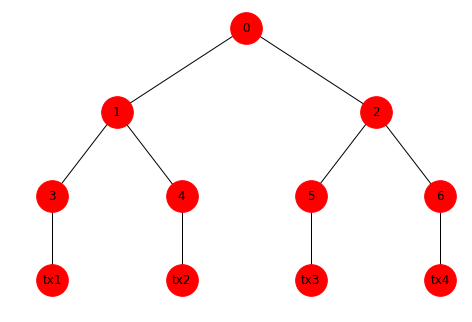

In [171]:
G = nx.Graph()
positions = {}
coordinates = [
    [0, 4],
    [-2, 3],
    [2, 3],
    [-3, 2],
    [-1, 2],
    [1, 2],
    [3, 2],
    [-3, 1],
    [-1, 1],
    [1, 1],
    [3, 1]
]
parents = [0, 0, 0, 1, 1, 2, 2, 3, 4, 5, 6]
for index in range(11):
    G.add_node(index)
    G.add_edge(index, parents[index])
    positions[index] = coordinates[index]
nx.draw(G, positions, node_size = 1000)
labels = {
    0: '0',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: 'tx1',
    8: 'tx2',
    9: 'tx3',
    10: 'tx4',
}
nx.draw_networkx_labels(G, positions, labels = labels)

In Bitcoin double sha256 hash scheme is used. Here is an example.

In [172]:
import hashlib


first_hash = hashlib.sha256(b"hello") # "b" stands for binary representation
second_hash = hashlib.sha256()
print('First hash represented as a hexadecimal number:', first_hash.hexdigest())
second_hash.update(first_hash.digest())
print('Second hash represented as a hexadecimal number:', second_hash.hexdigest())

First hash represented as a hexadecimal number: 2cf24dba5fb0a30e26e83b2ac5b9e29e1b161e5c1fa7425e73043362938b9824
Second hash represented as a hexadecimal number: 9595c9df90075148eb06860365df33584b75bff782a510c6cd4883a419833d50


Now we can easily change vertices' labels to hashes of corresponding messages and plot new graph

856a4921cd32690244af7568e7bd1391a94119e17c7f33234f4bf11271b223e5


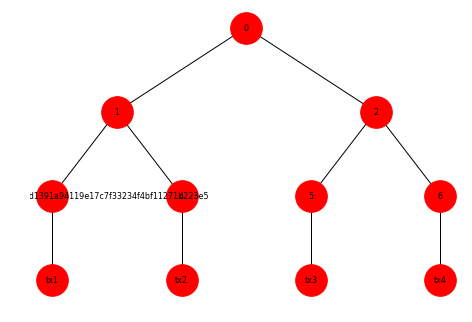

In [173]:
labels[3] = hashlib.sha256(hashlib.sha256(b"tx1").digest()).hexdigest()

# and plot the graph again

nx.draw(G, positions, node_size = 1000)
nx.draw_networkx_labels(G, positions, labels = labels, font_size = 8)
print(labels[3])

1.Construct Merkle hash tree using previously constructed graph by finding corresponding SHA256 hashes on vertices (2 points). Plot obtained Merkle hash tree (1 point)

label 0 5eaee129fb6c4761a542e919f8fd0fa3f3c3d83a33bbeeec5a7e8772ddfb8f88
label 1 41925fc3630f375e23755f04099f1b2c51f372a9792762b28478fbbc5faf1106
label 2 5c72c2fc6c2ed732c66fa8dc63f163617be1eb6175b88b3b640f440abb236e73
label 3 856a4921cd32690244af7568e7bd1391a94119e17c7f33234f4bf11271b223e5
label 4 79043a4d1d4d6d0b830519bfc07b92b4d162a4cd54235719c2c3cc211a638dfd
label 5 ef729c31d206229249bd791b29676d26cc7465aa6bc2003d80c7a82a316e0233
label 6 4746dc9c16f97469fa45710394c4a0e2f29226efc04cab47c29ce579ae19a74e
tx1 tx1
tx2 tx2
tx3 tx3
tx4 tx4


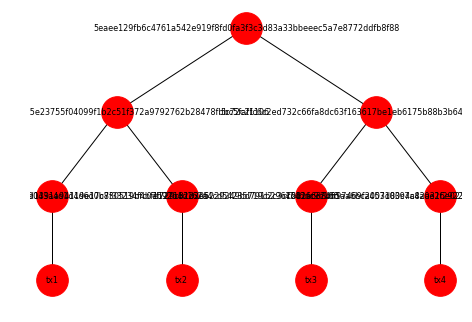

In [174]:



labels[3] = hashlib.sha256(hashlib.sha256(b"tx1").digest()).hexdigest()
labels[4] = hashlib.sha256(hashlib.sha256(b"tx2").digest()).hexdigest()
labels[5] = hashlib.sha256(hashlib.sha256(b"tx3").digest()).hexdigest()
labels[6] = hashlib.sha256(hashlib.sha256(b"tx4").digest()).hexdigest()


labels[1]= hashlib.sha256(hashlib.sha256(labels[3].encode('utf-8')+labels[4].encode('utf-8')).digest()).hexdigest()
labels[2]= hashlib.sha256(hashlib.sha256(labels[5].encode('utf-8')+labels[6].encode('utf-8')).digest()).hexdigest()

#label_0=binascii.unhexlify(labels[1]+labels[2])

labels[0]= hashlib.sha256(hashlib.sha256(labels[1].encode('utf-8')+labels[2].encode('utf-8')).digest()).hexdigest()


# and plot the graph again

nx.draw(G, positions, node_size = 1000)
nx.draw_networkx_labels(G, positions, labels = labels, font_size = 8)
print('label 0',labels[0])
print('label 1',labels[1])
print('label 2',labels[2])
print('label 3',labels[3])
print('label 4',labels[4])
print('label 5',labels[5])
print('label 6',labels[6])

print('tx1',labels[7])
print('tx2',labels[8])
print('tx3',labels[9])
print('tx4',labels[10])

2.Provide a proof of correctness of leaf tx2 (2 points). 

In [175]:
# in order to proof correctness of tx2 we need, compare all hashes tx2 and 4,
#1 and hash(hash(3)+hash(4)), 0 and hash(hash(1)+hash(2))
#make hash for tx2
labels[8] = hashlib.sha256(hashlib.sha256(b"tx2").digest()).hexdigest()
if labels[8]==labels[4]:
     print(True)
else:
    print(False)
lab1=hashlib.sha256(hashlib.sha256(labels[3].encode('utf-8')+labels[4].encode('utf-8')).digest()).hexdigest()
lab2=hashlib.sha256(hashlib.sha256(labels[5].encode('utf-8')+labels[6].encode('utf-8')).digest()).hexdigest()
lab0=hashlib.sha256(hashlib.sha256(lab1.encode('utf-8')+lab2.encode('utf-8')).digest()).hexdigest()
if labels[0]==lab0:
    print(True)
else:
    print(False)

True
True


3.Provide a proof of correctness for set of leafs (tx3-tx4) (2 points)

In [176]:
#For tx3
labels[9] = hashlib.sha256(hashlib.sha256(b"tx3").digest()).hexdigest()
if labels[9]==labels[5]:
     print(True)
else:
    print(False)
lab1=hashlib.sha256(hashlib.sha256(labels[3].encode('utf-8')+labels[4].encode('utf-8')).digest()).hexdigest()
lab2=hashlib.sha256(hashlib.sha256(labels[5].encode('utf-8')+labels[6].encode('utf-8')).digest()).hexdigest()
lab0=hashlib.sha256(hashlib.sha256(lab1.encode('utf-8')+lab2.encode('utf-8')).digest()).hexdigest()
if labels[0]==lab0:
    print(True)
else:
    print(False)
#For tx4
labels[10] = hashlib.sha256(hashlib.sha256(b"tx4").digest()).hexdigest()
if labels[10]==labels[6]:
     print(True)
else:
    print(False)
lab1=hashlib.sha256(hashlib.sha256(labels[3].encode('utf-8')+labels[4].encode('utf-8')).digest()).hexdigest()
lab2=hashlib.sha256(hashlib.sha256(labels[5].encode('utf-8')+labels[6].encode('utf-8')).digest()).hexdigest()
lab0=hashlib.sha256(hashlib.sha256(lab1.encode('utf-8')+lab2.encode('utf-8')).digest()).hexdigest()
if labels[0]==lab0:
    print(True)
else:
    print(False)

True
True
True
True


4.Change the value on leaf tx1 and recompute corresponding hashes. Plot newly obtained Merkle hash tree (2 points)

In [177]:
labels[7]='tx34'
labels

{0: '5eaee129fb6c4761a542e919f8fd0fa3f3c3d83a33bbeeec5a7e8772ddfb8f88',
 1: '41925fc3630f375e23755f04099f1b2c51f372a9792762b28478fbbc5faf1106',
 2: '5c72c2fc6c2ed732c66fa8dc63f163617be1eb6175b88b3b640f440abb236e73',
 3: '856a4921cd32690244af7568e7bd1391a94119e17c7f33234f4bf11271b223e5',
 4: '79043a4d1d4d6d0b830519bfc07b92b4d162a4cd54235719c2c3cc211a638dfd',
 5: 'ef729c31d206229249bd791b29676d26cc7465aa6bc2003d80c7a82a316e0233',
 6: '4746dc9c16f97469fa45710394c4a0e2f29226efc04cab47c29ce579ae19a74e',
 7: 'tx34',
 8: '79043a4d1d4d6d0b830519bfc07b92b4d162a4cd54235719c2c3cc211a638dfd',
 9: 'ef729c31d206229249bd791b29676d26cc7465aa6bc2003d80c7a82a316e0233',
 10: '4746dc9c16f97469fa45710394c4a0e2f29226efc04cab47c29ce579ae19a74e'}

In [178]:
labels[7] = hashlib.sha256(hashlib.sha256(b"tx34").digest()).hexdigest()
if labels[7]==labels[3]:
     print(True)
else:
    print(False)
labels[3]=hashlib.sha256(hashlib.sha256(b"tx34").digest()).hexdigest()
lab1=hashlib.sha256(hashlib.sha256(labels[3].encode('utf-8')+labels[4].encode('utf-8')).digest()).hexdigest()
lab2=hashlib.sha256(hashlib.sha256(labels[5].encode('utf-8')+labels[6].encode('utf-8')).digest()).hexdigest()
lab0=hashlib.sha256(hashlib.sha256(lab1.encode('utf-8')+lab2.encode('utf-8')).digest()).hexdigest()
if labels[0]==lab0:
    print(True)
else:
    print(False)

False
False


5.Nodes in Merkle hash trees may have arbitrary fanout. In previouse items we consider the case of fanout equals to two. But what will change if we set a fanout equals to three? Construct Merkle hash trees with fanout 3 to sign 9 values? Construct the hash tree with fanout 2 to sign the same set of values? Plot obtained trees (4 points) 

{0: Text(0,5,'0'),
 1: Text(-3,4,'1'),
 2: Text(0,4,'2'),
 3: Text(3,4,'3'),
 4: Text(-4,3,'4'),
 5: Text(-3,3,'5'),
 6: Text(-2,3,'6'),
 7: Text(-1,3,'7'),
 8: Text(0,3,'8'),
 9: Text(1,3,'9'),
 10: Text(2,3,'10'),
 11: Text(3,3,'11'),
 12: Text(4,3,'12'),
 13: Text(-4,2,'13'),
 14: Text(-3,2,'14'),
 15: Text(-2,2,'15'),
 16: Text(-1,2,'16'),
 17: Text(0,2,'17'),
 18: Text(1,2,'18'),
 19: Text(2,2,'19'),
 20: Text(3,2,'20'),
 21: Text(4,2,'21'),
 22: Text(-4,1,'tx1'),
 23: Text(-3,1,'tx2'),
 24: Text(-2,1,'tx3'),
 25: Text(-1,1,'tx4'),
 26: Text(0,1,'tx5'),
 27: Text(1,1,'tx6'),
 28: Text(2,1,'tx7'),
 29: Text(3,1,'tx8'),
 30: Text(4,1,'tx9')}

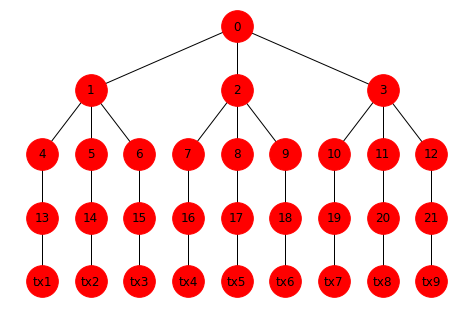

In [180]:
#For 3 sign and 9 values
G = nx.Graph()
positions = {}
coordinates = [
    [0, 5],
    [-3, 4],
    [0, 4],
    [3, 4],
    [-4, 3],
    [-3, 3],
    [-2, 3],
    [-1, 3],
    [0, 3],
    [1, 3],
    [2, 3],
    [3, 3],
    [4, 3],
    [-4, 2],
    [-3, 2],
    [-2, 2],
    [-1, 2],
    [0, 2],
    [1, 2],
    [2, 2],
    [3, 2],
    [4, 2],
    [-4, 1],
    [-3, 1],
    [-2, 1],
    [-1, 1],
    [0, 1],
    [1, 1],
    [2, 1],
    [3, 1],
    [4, 1]
]
parents = [0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
for index in range(31):
    G.add_node(index)
    G.add_edge(index, parents[index])
    positions[index] = coordinates[index]
nx.draw(G, positions, node_size = 1000)
labels = {
    0: '0',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
    10: '10',
    11: '11',
    12: '12',
    13:'13',
    14:'14',
    15:'15',
    16:'16',
    17:'17',
    18:'18',
    19:'19',
    20:'20',
    21:'21',
    22: 'tx1',
    23: 'tx2',
    24: 'tx3',
    25: 'tx4',
    26: 'tx5',
    27: 'tx6',
    28: 'tx7',
    29: 'tx8',
    30: 'tx9'
}
nx.draw_networkx_labels(G, positions, labels = labels)

{0: Text(0,5,'aaa583ec17aa4b9b01158e74b544e74e8b3ed3f9f5b7b9343f8e5e8f0fd6aef8'),
 1: Text(-3,4,'9a68523886d148d65e39c27359b1a22b401a5ea39ad0fbdbdb2ac62bee7f5d69'),
 2: Text(0,4,'8bfa7fd364fc1150dcd7d72232f27e61138027520487898e8f24255f4f36e65d'),
 3: Text(3,4,'c0eb82499f598532af5fffd692b344059beb2ae807f04e0ddb738973cd6a1aab'),
 4: Text(-4,3,'b98cf3a2f07180f54d12ed628ea3aaa28833383c28eb59517205390547ab0a33'),
 5: Text(-3,3,'d4653f6397a1aee0150d7d378c78ee61ac52bc41c4532dfb9b990dcbdc17bc26'),
 6: Text(-2,3,'d5111703f94b7eebc844f41f6ca18c6e6933f44a69e39a03048ecf229490bc40'),
 7: Text(-1,3,'266f9453cf955045cee4c204d9dd26e47dd0959a13ff9893bccc325f0400a3d4'),
 8: Text(0,3,'13fd25ff0642d744c69818a83bbd7341c48e9c097b587e5fe1ca477bac3b1cf8'),
 9: Text(1,3,'8e006247022127a5a3ba7551142692c651ad84f68e6ccaad504afc7085a03b80'),
 10: Text(2,3,'72255b3cf1d414e58036627a7da6109b761963d4f0f3d7976b8a0f9ee12dc0f1'),
 11: Text(3,3,'5e65f3ff9acff92c16d2c76c270003ad28d933f4b3c28269b0842486190c9e4e'),
 12: Text

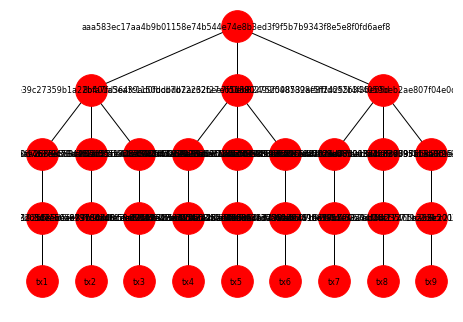

In [183]:
#lets make hashes for each node
for i in range(4,21):
    labels[i]= hashlib.sha256(hashlib.sha256(labels[i+4].encode('utf-8')).digest()).hexdigest()

labels[1]= hashlib.sha256(hashlib.sha256(labels[4].encode('utf-8')+labels[5].encode('utf-8')+labels[6].encode('utf-8')).digest()).hexdigest()
labels[2]= hashlib.sha256(hashlib.sha256(labels[7].encode('utf-8')+labels[8].encode('utf-8')+labels[9].encode('utf-8')).digest()).hexdigest() 
labels[3]= hashlib.sha256(hashlib.sha256(labels[10].encode('utf-8')+labels[11].encode('utf-8')+labels[12].encode('utf-8')).digest()).hexdigest()

labels[0]= hashlib.sha256(hashlib.sha256(labels[1].encode('utf-8')+labels[2].encode('utf-8')+labels[3].encode('utf-8')).digest()).hexdigest()

nx.draw(G, positions, node_size = 1000)
nx.draw_networkx_labels(G, positions, labels = labels, font_size = 8)

{0: Text(0,6,'0'),
 1: Text(-2,5,'1'),
 2: Text(2,5,'2'),
 3: Text(-4,4,'3'),
 4: Text(0,4,'4'),
 5: Text(4,4,'5'),
 6: Text(-4,3,'6'),
 7: Text(-2,3,'7'),
 8: Text(0,3,'8'),
 9: Text(2,3,'9'),
 10: Text(4,3,'10'),
 11: Text(-8,2,'11'),
 12: Text(-6,2,'12'),
 13: Text(-4,2,'13'),
 14: Text(-2,2,'14'),
 15: Text(0,2,'15'),
 16: Text(2,2,'16'),
 17: Text(4,2,'17'),
 18: Text(6,2,'18'),
 19: Text(8,2,'19'),
 20: Text(-8,1,'tx1'),
 21: Text(-6,1,'tx2'),
 22: Text(-4,1,'tx3'),
 23: Text(-2,1,'tx4'),
 24: Text(0,1,'tx5'),
 25: Text(2,1,'tx6'),
 26: Text(4,1,'tx7'),
 27: Text(6,1,'tx8'),
 28: Text(8,1,'tx9')}

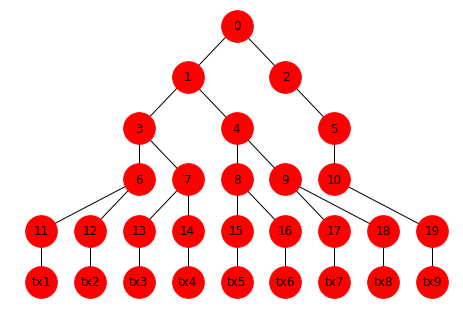

In [166]:
#For 2 
G = nx.Graph()
positions = {}
coordinates = [
    [0, 6],
    [-2, 5],
    [2, 5],
    [-4, 4],
    [0, 4],
    [4, 4],
    [-4, 3],
    [-2, 3],
    [0, 3],
    [2, 3],
    [4, 3],
    [-8, 2],
    [-6, 2],
    [-4, 2],
    [-2, 2],
    [0, 2],
    [2, 2],
    [4, 2],
    [6, 2],
    [8, 2],
    [-8, 1],
    [-6, 1],
    [-4, 1],
    [-2, 1],
    [0, 1],
    [2, 1],
    [4, 1],
    [6, 1],
    [8, 1]
]
parents = [0, 0,0,1,1,2,3, 3,4,4,5,6,6,7,7,8,8,9,9,10,11,12,13,14,15,16,17,18,19]
for index in range(29):
    G.add_node(index)
    G.add_edge(index, parents[index])
    positions[index] = coordinates[index]
nx.draw(G, positions, node_size = 1000)
labels = {
    0: '0',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
    10: '10',
    11: '11',
    12: '12',
    13: '13',
    14: '14',
    15: '15',
    16: '16',
    17: '17',
    18: '18',
    19: '19',
    20: 'tx1',
    21: 'tx2',
    22: 'tx3',
    23: 'tx4',
    24: 'tx5',
    25: 'tx6',
    26: 'tx7',
    27: 'tx8',
    28: 'tx9'
}
nx.draw_networkx_labels(G, positions, labels = labels)

{0: Text(0,6,'011837dfa05282399a1ec18d38c95efa5b2231e6d096aff9036269aa11f667be'),
 1: Text(-2,5,'a1fc168c0b8821e6045b1560c791d9abb9107e38b539d22f2e48f73a5e923305'),
 2: Text(2,5,'1d5acdeb18c0a72f5ec33b8049b7990cdd40ee81acae5375dfd0f1c06c32252b'),
 3: Text(-4,4,'3289814fb4922f91134aba302f16ddff00ac2447a800ae9508837ba3880e0106'),
 4: Text(0,4,'b47f57cfca863f12f47a6a15512b5fce0dae8a3afe813f10f57180f919408e03'),
 5: Text(4,4,'1d5acdeb18c0a72f5ec33b8049b7990cdd40ee81acae5375dfd0f1c06c32252b'),
 6: Text(-4,3,'476a24b686cde5defcc2f6189fc41aaaf9fdd7ebfba2541811870058a835480d'),
 7: Text(-2,3,'29879250ace869291077ce32716ef378c2775cbc3eed6bbe98bdea1ab5876bec'),
 8: Text(0,3,'c79719f56f25fcae9e47b0336f30d1d3c085afc934bafd372f0b546ab682fb02'),
 9: Text(2,3,'26d31590c0c2130ecc9e15a2f593d2d293b9d62674d5e060615506e204ed8ab9'),
 10: Text(4,3,'1d5acdeb18c0a72f5ec33b8049b7990cdd40ee81acae5375dfd0f1c06c32252b'),
 11: Text(-8,2,'2e16ecb5f8705ab7ebdbda2dda0749c76fc271967648b9a06efb6560550429f0'),
 12: Text

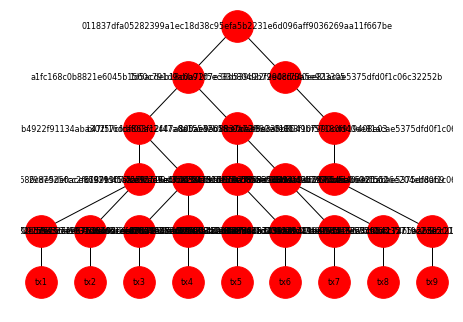

In [168]:
#lets make hashes for each node

for i in range(11,19):
    labels[i]= hashlib.sha256(hashlib.sha256(labels[i+4].encode('utf-8')).digest()).hexdigest()
    
labels[6]= hashlib.sha256(hashlib.sha256(labels[11].encode('utf-8')+labels[12].encode('utf-8')).digest()).hexdigest()
labels[7]= hashlib.sha256(hashlib.sha256(labels[13].encode('utf-8')+labels[14].encode('utf-8')).digest()).hexdigest()
labels[8]= hashlib.sha256(hashlib.sha256(labels[15].encode('utf-8')+labels[16].encode('utf-8')).digest()).hexdigest()
labels[9]= hashlib.sha256(hashlib.sha256(labels[17].encode('utf-8')+labels[18].encode('utf-8')).digest()).hexdigest()
labels[10]=hashlib.sha256(hashlib.sha256(b"tx9").digest()).hexdigest()
labels[3]= hashlib.sha256(hashlib.sha256(labels[6].encode('utf-8')+labels[7].encode('utf-8')).digest()).hexdigest()
labels[4]= hashlib.sha256(hashlib.sha256(labels[8].encode('utf-8')+labels[9].encode('utf-8')).digest()).hexdigest()
labels[5]=hashlib.sha256(hashlib.sha256(b"tx9").digest()).hexdigest()
labels[1]= hashlib.sha256(hashlib.sha256(labels[3].encode('utf-8')+labels[4].encode('utf-8')).digest()).hexdigest()
labels[2]=hashlib.sha256(hashlib.sha256(b"tx9").digest()).hexdigest()
labels[0]= hashlib.sha256(hashlib.sha256(labels[1].encode('utf-8')+labels[2].encode('utf-8')).digest()).hexdigest()
nx.draw(G, positions, node_size = 1000)
nx.draw_networkx_labels(G, positions, labels = labels, font_size = 8)

6.What is the optimum tree fanout for signing first 4 values in the set up of previouse item? (2 points)

If we want hash first 4 leafs, it will be better way to construct merkle tree with 4 fanout, it will be usefull because such way we can reduce our calculation. We can use 2, but it is mean that our merkle tree will be deaper, thats means that optimum is 4.